In [2]:
import librosa 
audiopath = '/Users/batu/Desktop/PROJECTS/MLP/3_person/batuhan_0.wav'
x, sr = librosa.load(audiopath)
print(type(x), type(sr))
mfcc = librosa.feature.mfcc(x, sr)
print(mfcc.shape)
# First index of the shape is the number of mfccs extracted (20 in this case) 
# and the second index is the number of frames available in the audio file.
stft = librosa.stft(x)  

<class 'numpy.ndarray'> <class 'int'>
(20, 65)


In [3]:
import IPython.display as ipd
ipd.Audio(audiopath)

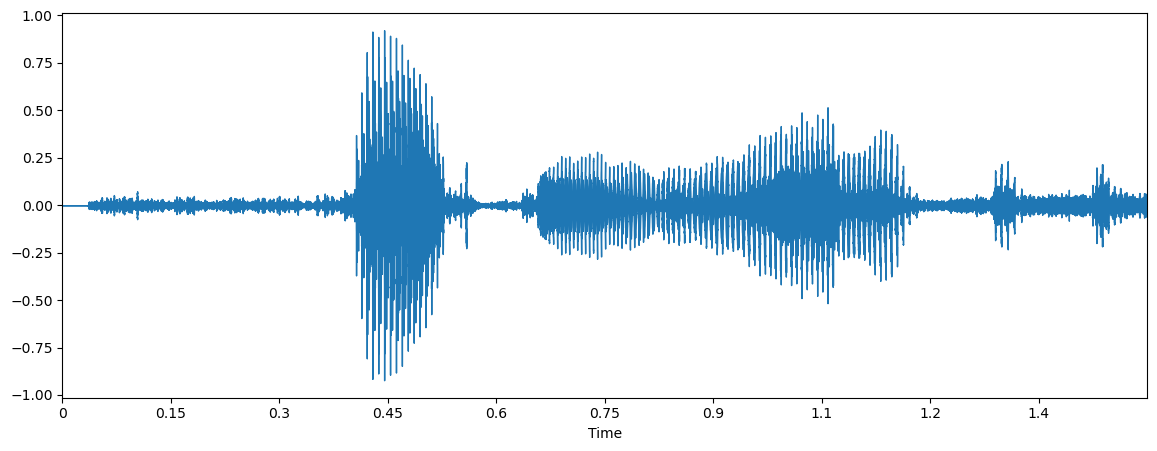

In [4]:
# Visualizing the Audio Waveform:

%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

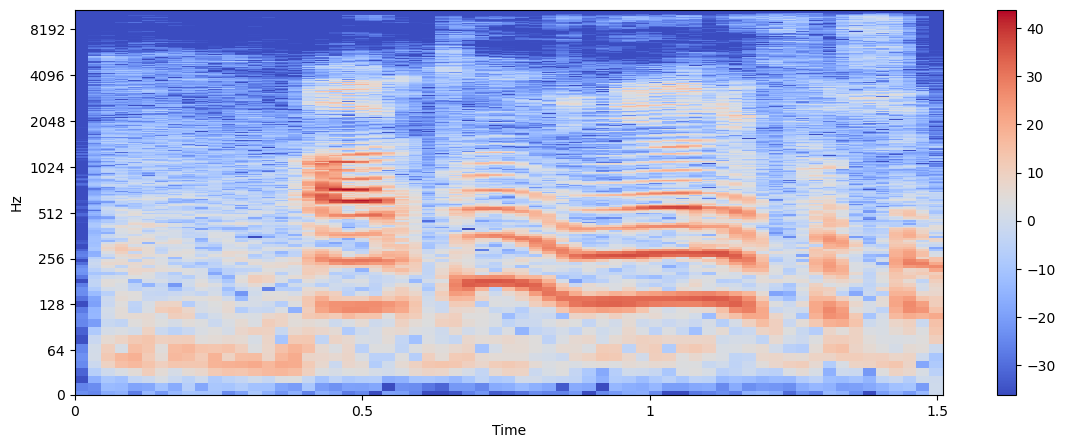

In [5]:
# Stft is a 2D array with complex numbers.
# We can get the amplitude of the complex numbers by using abs() function.

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
# Frequency is in Hz and time is in seconds.
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
# Y_axis is in log and X_axis is in seconds.
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

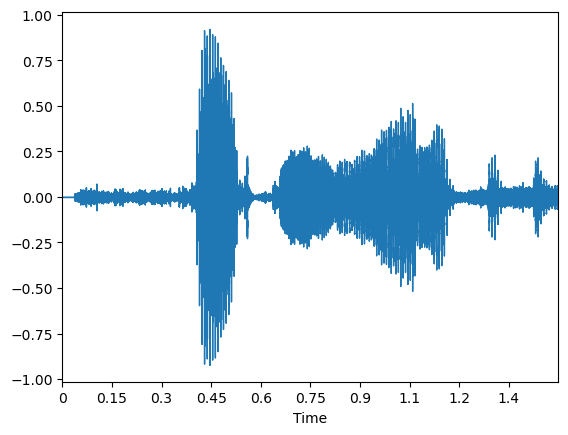

In [6]:
librosa.display.waveplot(x, sr=sr)

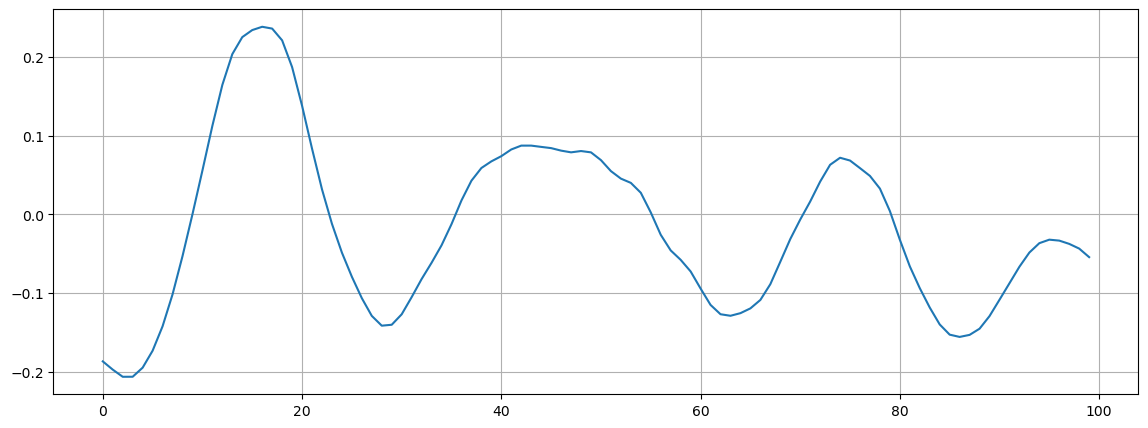

In [7]:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [8]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print(sum(zero_crossings))

6


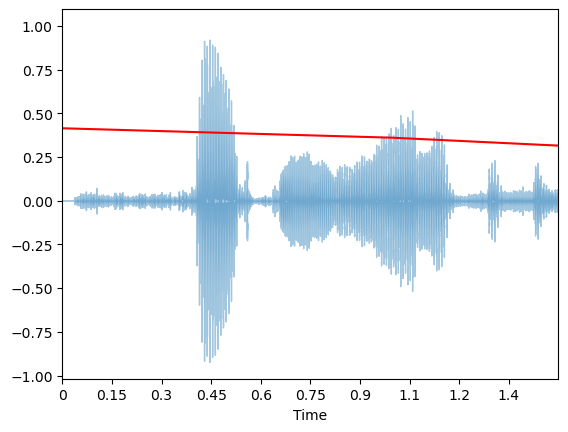

In [9]:
# Spectral Centroid Feature

import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x, sr=sr)[0]
spectral_centroids.shape

frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(normalize(spectral_centroids), color='r')

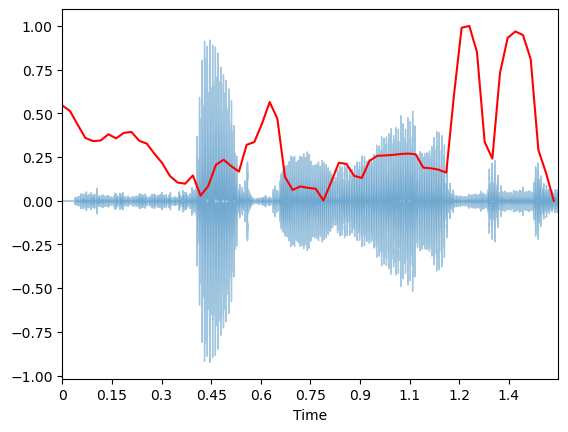

In [10]:
# Spectral RollOff Feature
spectral_rolloff = librosa.feature.spectral_rolloff(x, sr=sr)[0]
librosa.display.waveplot(x, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

(20, 65)


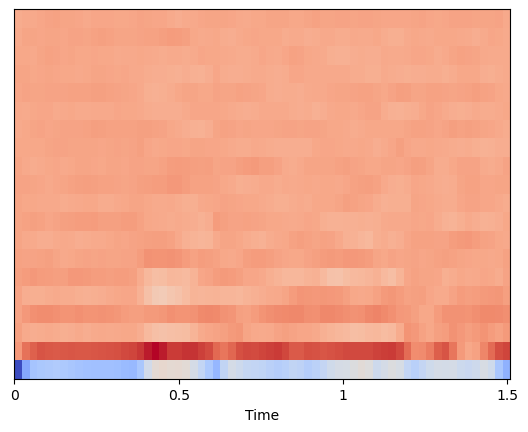

In [11]:
# Extract the Mel-Frequency Cepstral Coefficients
mfccs = librosa.feature.mfcc(x, sr=sr)
print(mfccs.shape)

librosa.display.specshow(mfccs, sr=sr, x_axis='time')